# Pandas Lab Assignment - Diamonds

The following csv data file contains data of diamonds with following characteristics.

carat - diamond's apparent size <br>
cut - how good the diamond shaping is <br>
color - colour of a diamond as letter representation <br>
clarity - clarity of diamond <br>
depth - depth of diamond <br>
table - top surface of diamond <br>
price - price of diamond <br>
x - x dimension <br>
y - y dimension<br>
z - z dimension <br>

Read the file and find the following:

1. Drop the unnamed column from the dataset once you read it  
2. The occurences of all unique colors of diamonds, bar chart of the same.     
3. Average price of each cut of diamond.  
4. Find the volume of every diamond and store it in a new column in the dataset. (volume = x*y*z)   
5. Histograms of Price and depths colums as two separate plots  
6. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.  
7. Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only  
8. Which clarity(i.e the category) diamond has maximum mean depth?  
9. Find the diamond(i.e row) with minimum price per volume

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./data/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [3]:
df.shape

(53940, 11)

In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
for i in df.columns:
    print(i, end= '\t\t')
    df1=df.drop(i,axis=1)
    print(df1.shape[0]==df.shape[0])

Unnamed: 0		True
carat		True
cut		True
color		True
clarity		True
depth		True
table		True
price		True
x		True
y		True
z		True


## 1. Drop the unnamed column from the dataset once you read it

In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
df['Unnamed: 0']

0            1
1            2
2            3
3            4
4            5
         ...  
53935    53936
53936    53937
53937    53938
53938    53939
53939    53940
Name: Unnamed: 0, Length: 53940, dtype: int64

In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2.The occurences of all unique colors of diamonds, bar chart of the same.

In [9]:
list(df['color'].unique())

['E', 'I', 'J', 'H', 'F', 'G', 'D']

In [10]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [11]:
colorcount= df['color'].value_counts()
for i in range(len(colorcount)):
    print("count of {0} color is {1}".format(colorcount.index[i],colorcount[i]))

count of G color is 11292
count of E color is 9797
count of F color is 9542
count of H color is 8304
count of D color is 6775
count of I color is 5422
count of J color is 2808


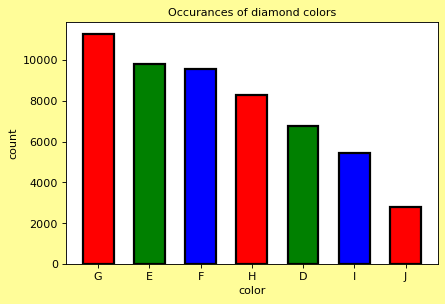

In [12]:
plt.figure(dpi=80 , facecolor='#fffd99')
plt.bar(colorcount.index,colorcount,width=0.6,edgecolor='k',linewidth=2,color=['r','g','b'])
plt.xlabel('color',fontsize=10)
plt.ylabel('count', fontsize=10)
plt.title('Occurances of diamond colors',fontsize=10)
plt.show()

## 3.Average price of each cut of diamond.

In [13]:
list(df['cut'].unique())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [14]:
for cut,slicedcut in df.groupby('cut'):
    avgprice=slicedcut['price'].mean()
    print("Average price of {0} cut is ${1:.2f}".format(cut,avgprice))
    

Average price of Fair cut is $4358.76
Average price of Good cut is $3928.86
Average price of Ideal cut is $3457.54
Average price of Premium cut is $4584.26
Average price of Very Good cut is $3981.76


## 4. Find the volume of every diamond and store it in a new column in the dataset. (volume = xyz)

In [15]:
df1= df['x']*df['y']*df['z']
df1

0         38.202030
1         34.505856
2         38.076885
3         46.724580
4         51.917250
            ...    
53935    115.920000
53936    118.110175
53937    114.449728
53938    140.766120
53939    124.568444
Length: 53940, dtype: float64

In [16]:
df['volume'] = df['x']*df['y']*df['z']
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [17]:
## 5.Histograms of Price and depths colums as two separate plots

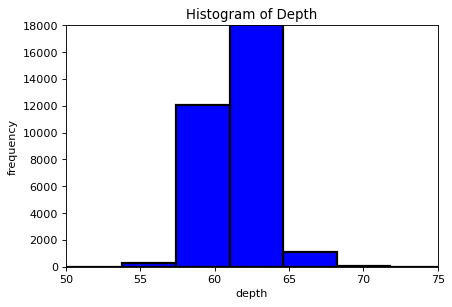

In [18]:
plt.figure(dpi=80)
plt.hist(df['depth'],color='b',linewidth=2,edgecolor='k')
plt.xlabel('depth')
plt.ylabel('frequency')
plt.title("Histogram of Depth")
plt.axis([50,75,0,18000])
plt.show()

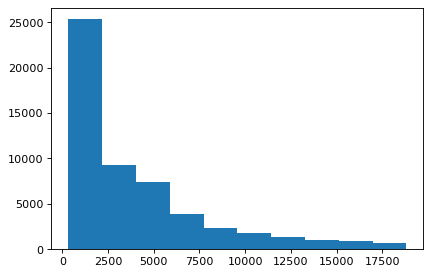

In [19]:
plt.figure(dpi=80)
plt.hist(df['price'])
plt.show()

## 6. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.

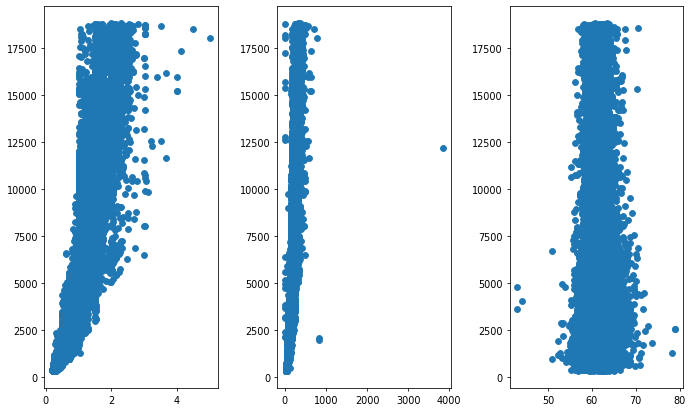

In [20]:
plt.figure(dpi=70,figsize=(10,6))
plt.subplot(1,3,1)
plt.scatter(df['carat'],df['price'])
plt.subplot(1,3,2)
plt.scatter(df['volume'],df['price'])
plt.subplot(1,3,3)
plt.scatter(df['depth'],df['price'])
plt.tight_layout()
plt.show()

## 7. Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only

In [23]:
df.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'volume'],
      dtype='object')

In [24]:
color = list(df['color'].unique())
color.sort()
print(color)
num = range(len(color))
print(num)
mapping = dict(zip(color,num))

['D', 'E', 'F', 'G', 'H', 'I', 'J']
range(0, 7)


## 8.Which clarity(i.e the category) diamond has maximum mean depth?

In [25]:
maxmdepth=0
for clarity,sliceddf in df.groupby('clarity'):
    mdepth = sliceddf['depth'].mean()
    if maxmdepth < mdepth:
        maxmdepth,maxclarity = mdepth,clarity
print("{1} clarity of diamond has maximum depth is {0:.2f}".format(maxmdepth,maxclarity))

I1 clarity of diamond has maximum depth is 62.73


## 9.Find the diamond(i.e row) with minimum price per volume

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [26]:
ppv= df['price']/df['volume']
df[ppv == ppv.min()]


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,838.5024
